In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

C:\Users\Dev Gupta\AppData\Local\Temp\ipykernel_32840\1866303381.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [43]:
df=pd.read_csv('risk.csv')#Kindly change input file name as stored
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [3]:
df.shape

(858, 36)

In [4]:
df.drop(columns=['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True)
df.shape

(858, 34)

In [5]:
for _ in df.columns:
    print(df[_].value_counts())

23    54
18    50
21    46
20    45
19    44
24    39
25    39
26    38
28    37
17    35
30    35
29    33
27    33
22    30
35    29
33    28
31    27
34    24
36    24
16    23
15    21
32    18
37    17
41    13
40    12
38     9
39     9
44     6
45     6
42     6
14     5
43     5
46     3
70     2
49     2
52     2
48     2
59     1
79     1
84     1
47     1
13     1
50     1
51     1
Name: Age, dtype: int64
2     272
3     208
1     206
4      78
5      44
?      26
6       9
7       7
8       4
15      1
10      1
28      1
9       1
Name: Number of sexual partners, dtype: int64
15    163
17    151
18    137
16    121
14     79
19     60
20     37
13     25
21     20
23      9
22      9
?       7
26      7
12      6
27      6
24      6
29      5
28      3
11      2
25      2
10      2
32      1
Name: First sexual intercourse, dtype: int64
1     270
2     240
3     139
4      74
?      56
5      35
6      18
0      16
7       6
8       2
11      1
10      1
Name: Num of pregna

In [6]:
df.drop(columns=['STDs:cervical condylomatosis','STDs:AIDS'],inplace=True)
df.shape

(858, 32)

In [7]:
df.replace('?',np.NaN,inplace=True)
df.dropna(inplace=True)
df.shape

(668, 32)

In [8]:
for _ in df.columns:
    print(df[_].value_counts())

23    43
18    38
21    38
20    35
28    31
24    31
19    30
25    29
27    28
30    28
26    27
35    26
17    26
33    25
29    24
36    21
22    18
34    18
16    17
31    17
32    16
15    15
37    13
40    11
41    10
39     9
38     6
45     5
42     5
43     5
44     4
46     3
48     2
52     2
14     2
70     2
49     2
51     1
79     1
84     1
47     1
13     1
50     1
Name: Age, dtype: int64
2     214
3     176
1     163
4      60
5      38
6       7
7       5
8       4
28      1
Name: Number of sexual partners, dtype: int64
15    136
17    118
18    111
16     86
14     58
19     48
20     33
21     18
13     14
23      8
26      7
24      6
22      6
27      4
29      4
28      3
25      2
10      2
12      2
32      1
11      1
Name: First sexual intercourse, dtype: int64
1     214
2     200
3     117
4      69
5      29
6      17
0      14
7       5
8       1
11      1
10      1
Name: Num of pregnancies, dtype: int64
0    572
1     96
Name: Smokes, dtype: int64
0   

In [9]:
df_cat=df.loc[ : ,['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B','STDs:HPV','Dx:Cancer','Dx:CIN','Dx:HPV','Dx']]
df_cat.shape

(668, 18)

In [10]:
df_num=df.drop(columns=['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B','STDs:HPV','Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Citology','Biopsy'])
df_num.shape

(668, 10)

In [11]:
# Importing libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the dataframe
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

df_scaled.shape

(668, 10)

In [12]:
pca = PCA(n_components=4)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)
df_pca.shape
df_pca_df=pd.DataFrame(df_pca)

In [13]:
print(pca.explained_variance_ratio_)

[0.21664816 0.19018901 0.1520787  0.11622665]


In [14]:
df_cat

,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
854,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
855,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
856,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df_cat.reset_index(inplace=True)
df_cat.drop(columns='index',inplace=True)
df_cat

,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
664,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
665,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
666,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
print(type(df_pca_df))

<class 'pandas.core.frame.DataFrame'>


In [17]:
df_con=pd.concat([df_pca_df,df_cat],axis=1)
df_con.shape

(668, 22)

In [18]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   0                                   668 non-null    float64
 1   1                                   668 non-null    float64
 2   2                                   668 non-null    float64
 3   3                                   668 non-null    float64
 4   Smokes                              668 non-null    object 
 5   Hormonal Contraceptives             668 non-null    object 
 6   IUD                                 668 non-null    object 
 7   STDs                                668 non-null    object 
 8   STDs:condylomatosis                 668 non-null    object 
 9   STDs:vaginal condylomatosis         668 non-null    object 
 10  STDs:vulvo-perineal condylomatosis  668 non-null    object 
 11  STDs:syphilis                       668 non-n

In [19]:
df_con.columns = df_con.columns.astype(str)

In [20]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   0                                   668 non-null    float64
 1   1                                   668 non-null    float64
 2   2                                   668 non-null    float64
 3   3                                   668 non-null    float64
 4   Smokes                              668 non-null    object 
 5   Hormonal Contraceptives             668 non-null    object 
 6   IUD                                 668 non-null    object 
 7   STDs                                668 non-null    object 
 8   STDs:condylomatosis                 668 non-null    object 
 9   STDs:vaginal condylomatosis         668 non-null    object 
 10  STDs:vulvo-perineal condylomatosis  668 non-null    object 
 11  STDs:syphilis                       668 non-n

In [21]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_balanced, y_balanced = smote.fit_resample(df_con, df['Hinselmann'])
df_balanced = pd.concat([pd.DataFrame(X_balanced), pd.DataFrame(y_balanced)], axis=1)

In [23]:
df_con.shape

(668, 22)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
from sklearn.neighbors import KNeighborsClassifier

k = 2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=2)

In [27]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test_scaled)
haccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", haccuracy)


Accuracy: 0.91796875


In [28]:
from sklearn.metrics import precision_score
hprecision = precision_score(y_test, y_pred, average='weighted')

print("KNN model precision: ", hprecision)

KNN model precision:  0.9185090550818868


In [29]:
from sklearn.metrics import recall_score
hrecall = recall_score(y_test, y_pred, average='weighted')

print("KNN model recall: ", hrecall)

KNN model recall:  0.91796875


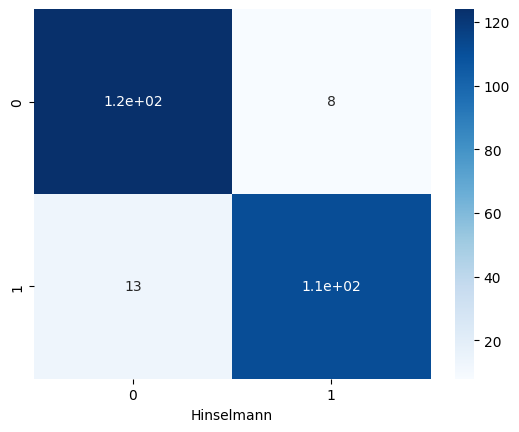

In [30]:
from sklearn.metrics import confusion_matrix

hcm = confusion_matrix(y_test, y_pred)

sns.heatmap(hcm, annot=True, cmap='Blues')
plt.xlabel('Hinselmann')
plt.show()

In [31]:
corr_matrix = df_balanced.corr()
corr_matrix

C:\Users\Dev Gupta\AppData\Local\Temp\ipykernel_32840\477442902.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_balanced.corr()


,0,1,2,3,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann
0,1.000000,-0.003931,-0.048127,-0.013901,0.052168,-0.009518,0.052153,-0.015173,-0.020920
1,-0.003931,1.000000,-0.079516,0.000917,-0.061050,-0.014057,-0.058530,-0.046719,0.101414
2,-0.048127,-0.079516,1.000000,0.011925,-0.018335,0.018847,-0.006661,-0.035846,-0.097834
3,-0.013901,0.000917,0.011925,1.000000,-0.019232,0.048649,-0.013012,0.028041,-0.014735
Dx:Cancer,0.052168,-0.061050,-0.018335,-0.019232,1.000000,-0.008032,0.954129,0.858891,0.038930
Dx:CIN,-0.009518,-0.014057,0.018847,0.048649,-0.008032,1.000000,-0.007910,0.307645,-0.048545
Dx:HPV,0.052153,-0.058530,-0.006661,-0.013012,0.954129,-0.007910,1.000000,0.808097,0.044438
Dx,-0.015173,-0.046719,-0.035846,0.028041,0.858891,0.307645,0.808097,1.000000,0.025451
Hinselmann,-0.020920,0.101414,-0.097834,-0.014735,0.038930,-0.048545,0.044438,0.025451,1.000000


<AxesSubplot: >

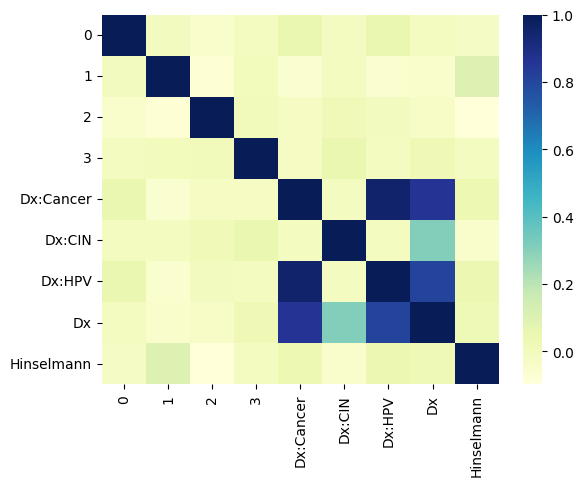

In [32]:
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [33]:
from imblearn.over_sampling import SMOTE

# Assume 'X' is the feature matrix and 'y' is the target column
# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Resample the data
X_balanced, y_balanced = smote.fit_resample(df_con, df['Schiller'])
df_balanced = pd.concat([pd.DataFrame(X_balanced), pd.DataFrame(y_balanced)], axis=1)
# df_balanced.columns = df_con.columns

df_con.shape


from sklearn.model_selection import train_test_split

# Assume 'X_balanced' is the feature matrix and 'y_balanced' is the target column after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier

k = 2 # number of nearest neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)


from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test_scaled)
saccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", saccuracy)

from sklearn.metrics import precision_score
sprecision = precision_score(y_test, y_pred, average='weighted')


print("KNN model precision: ", sprecision)

from sklearn.metrics import recall_score
srecall = recall_score(y_test, y_pred, average='weighted')

print("KNN model recall: ", srecall)

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix


Accuracy: 0.871900826446281
KNN model precision:  0.8754956733584384
KNN model recall:  0.871900826446281


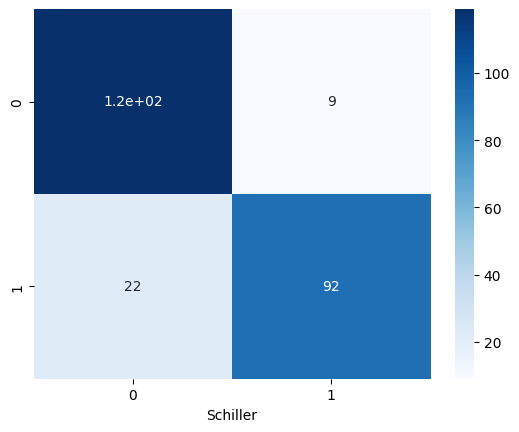

In [34]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Schiller')
plt.show()

C:\Users\Dev Gupta\AppData\Local\Temp\ipykernel_32840\3877817049.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_balanced.corr()


<AxesSubplot: >

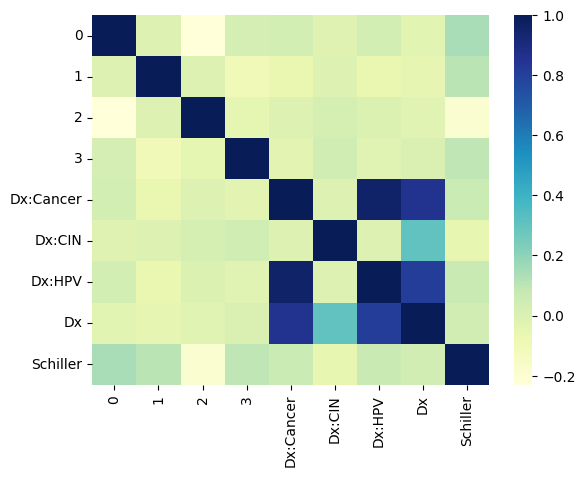

In [35]:
corr_matrix = df_balanced.corr()
corr_matrix

sns.heatmap(corr_matrix, cmap="YlGnBu")

In [36]:
from imblearn.over_sampling import SMOTE

# Assume 'X' is the feature matrix and 'y' is the target column
# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Resample the data
X_balanced, y_balanced = smote.fit_resample(df_con, df['Citology'])
df_balanced = pd.concat([pd.DataFrame(X_balanced), pd.DataFrame(y_balanced)], axis=1)
# df_balanced.columns = df_con.columns

df_con.shape


from sklearn.model_selection import train_test_split

# Assume 'X_balanced' is the feature matrix and 'y_balanced' is the target column after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier

k = 2 # number of nearest neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)


from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test_scaled)
caccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", caccuracy)

from sklearn.metrics import precision_score
cprecision = precision_score(y_test, y_pred, average='weighted')


print("KNN model precision: ", cprecision)

from sklearn.metrics import recall_score
crecall = recall_score(y_test, y_pred, average='weighted')

print("KNN model recall: ", crecall)

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix



Accuracy: 0.8571428571428571
KNN model precision:  0.8579010551589057
KNN model recall:  0.8571428571428571


<AxesSubplot: >

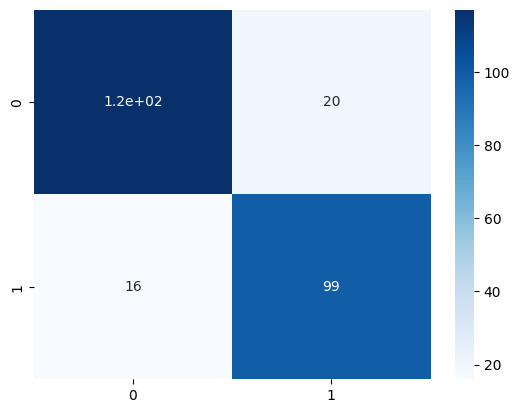

In [37]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')

C:\Users\Dev Gupta\AppData\Local\Temp\ipykernel_32840\3877817049.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_balanced.corr()


<AxesSubplot: >

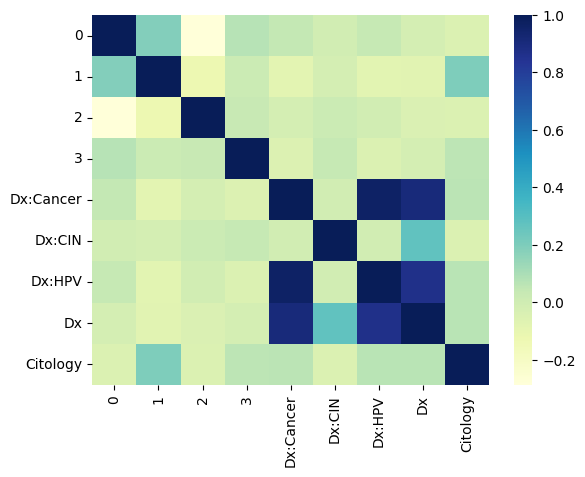

In [38]:
corr_matrix = df_balanced.corr()
corr_matrix

sns.heatmap(corr_matrix, cmap="YlGnBu")

In [39]:
from imblearn.over_sampling import SMOTE

# Assume 'X' is the feature matrix and 'y' is the target column
# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Resample the data
X_balanced, y_balanced = smote.fit_resample(df_con, df['Biopsy'])
df_balanced = pd.concat([pd.DataFrame(X_balanced), pd.DataFrame(y_balanced)], axis=1)
# df_balanced.columns = df_con.columns

df_con.shape


from sklearn.model_selection import train_test_split

# Assume 'X_balanced' is the feature matrix and 'y_balanced' is the target column after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier

k = 2 # number of nearest neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)


from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test_scaled)
baccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", baccuracy)

from sklearn.metrics import precision_score
bprecision = precision_score(y_test, y_pred, average='weighted')


print("KNN model precision: ", bprecision)

from sklearn.metrics import recall_score
brecall = recall_score(y_test, y_pred, average='weighted')

print("KNN model recall: ", brecall)

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix




Accuracy: 0.916
KNN model precision:  0.9178028169014085
KNN model recall:  0.916


<AxesSubplot: >

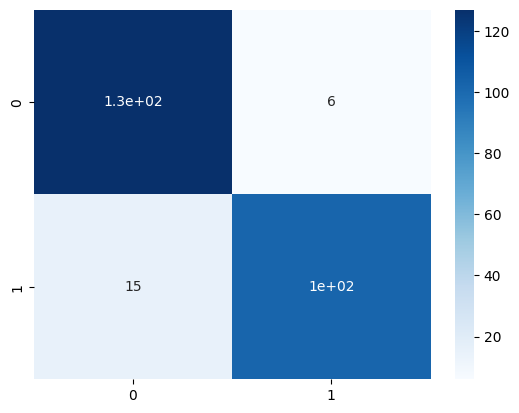

In [40]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')

C:\Users\Dev Gupta\AppData\Local\Temp\ipykernel_32840\3877817049.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_balanced.corr()


<AxesSubplot: >

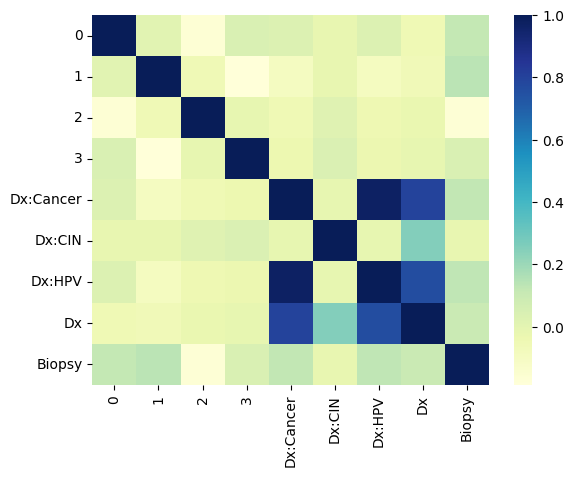

In [41]:
corr_matrix = df_balanced.corr()
corr_matrix

sns.heatmap(corr_matrix, cmap="YlGnBu")

In [42]:
data={
    'Target': ['Hinselmann','Schiller','Citology','Biopsy'],
    'Accuracy':[haccuracy,saccuracy,caccuracy,baccuracy],
    'Precision':[hprecision,sprecision,cprecision,bprecision],
    'Recall':[hrecall,srecall,crecall,brecall]
}
df_fin=pd.DataFrame(data)
df_fin.set_index('Target',inplace=True)
df_fin

,Accuracy,Precision,Recall
Target,,,
Hinselmann,0.917969,0.918509,0.917969
Schiller,0.871901,0.875496,0.871901
Citology,0.857143,0.857901,0.857143
Biopsy,0.916000,0.917803,0.916000
